In [20]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [21]:
df = pd.read_csv('Iris.csv',index_col=0)

In [22]:
df = df.drop(['Species'],axis='columns')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [23]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)


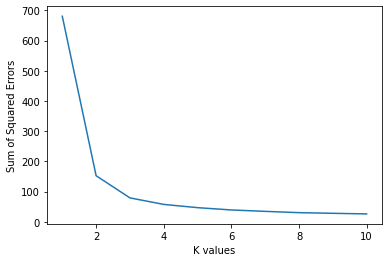

In [24]:
plt.xlabel('K values')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng,sse)

In [26]:
#the optimum number of clusters according to the elbow curve is '3'

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
df['cluster'] = y_predicted
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

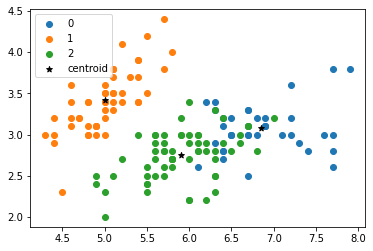

In [34]:
#Plotting scatter plot with the designed clusters and first two columns of the data set i.e. sepal length and width
groups = df.groupby('cluster')
for name, group in groups:
    plt.scatter(group['SepalLengthCm'], group['SepalWidthCm'],label=name)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='black',label='centroid')
plt.legend(loc='best')